In [ ]:
#Import required libraries
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
# print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
layers = keras.layers
models = keras.models


# This code was tested with TensorFlow v1.8
print("You have TensorFlow version", tf.__version__)

In [2]:
# Change working directory to C://Practicuum Project 2//BBCTextClassification
import os
os.chdir('C://Practicuum Project 2//BBCTextClassification/data')
print(os.getcwd())

C:\Practicuum Project 2\BBCTextClassification\data


In [3]:
# load the dataset 

import numpy as np
import pandas as pd

bbc_data=pd.read_csv('bbc-text.csv', ',')

In [4]:
bbc_data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [14]:
bbc_data['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

In [15]:
train_size = int(len(bbc_data) * .8)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(bbc_data) - train_size))

Train size: 1780
Test size: 445


In [29]:
def train_test_split(data, train_size):
    train = bbc_data[:train_size]
    test = bbc_data[train_size:]
    return train, test

Data preparation
There's some work to be done in order for our data to be ready for training.

First we'll split the data into training and test sets.
Then we'll tokenize the words (text), and then convert them to a numbered index.
Next we'll do the same for the labels (categories), by using the LabelEncoder utility.
Finally, we'll convert the labels to a one-hot representation.

In [31]:
train, test = train_test_split_2(bbc_data, train_size)

In [34]:
test.head()

,category,text
1780,entertainment,hobbit picture four years away lord of the r...
1781,tech,game firm holds cast auditions video game fi...
1782,politics,clarke plans migrant point scheme anyone plann...
1783,sport,radcliffe will compete in london paula radclif...
1784,sport,serena becomes world number two serena william...


In [35]:
train_cat=train['category']
test_cat=test['category']
train_text=train['text']
test_text=test['text']

In [13]:
pip install tensorflow

  Using cached https://files.pythonhosted.org/packages/af/50/d7da24189d95e2084bb1cc350a8e4acdf1b0c9b3d57def7a348f0d9cb062/tensorflow-2.2.0-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/a1/6b/7f62017e3f0b32438dd90bdc1ff0b7b1448b6cb04a1ed84f37b6de95cd7b/h5py-2.10.0-cp37-cp37m-win_amd64.whl
  Found existing installation: h5py 2.9.0
    Uninstalling h5py-2.9.0:
      Successfully uninstalled h5py-2.9.0
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [14]:
pip install Keras

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
# Change working directory to C://Practicuum Project 2//BBCTextClassification
import os
os.chdir('C://Practicuum Project 2//Tensorflow')
print(os.getcwd())

C:\Practicuum Project 2\Tensorflow


In [4]:
pip install tensorflow==2.0.0

  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7546 sha256=6b9f48c939488ff4cdc7b773a720d9e7e7f5b8e50466e120bd590ff926f90e0e
  Stored in directory: C:\Users\tabas\AppData\Local\pip\Cache\wheels\5c\2e\7e\a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
from tensorflow import keras
layers = keras.layers
models = keras.models

In [8]:
max_words = 1000
tokenize = keras.preprocessing.text.Tokenizer(num_words=max_words, 
                                              char_level=False)

In [37]:
tokenize.fit_on_texts(train_text) # fit tokenizer to our training text data
x_train = tokenize.texts_to_matrix(train_text)
x_test = tokenize.texts_to_matrix(test_text)

In [11]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

In [38]:
# Use sklearn utility to convert label strings to numbered index
encoder = LabelEncoder()
encoder.fit(train_cat)
y_train = encoder.transform(train_cat)
y_test = encoder.transform(test_cat)

In [39]:
# Converts the labels to a one-hot representation
num_classes = np.max(y_train) + 1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [40]:
# Inspect the dimensions of our training and test data (this is helpful to debug)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (1780, 1000)
x_test shape: (445, 1000)
y_train shape: (1780, 5)
y_test shape: (445, 5)


Train the model. 
Build the model using Keras layers and hyperparameters of your choosing. Then call model.fit()

In [41]:
# This model trains very quickly and 2 epochs seem to give good results
# Training for more epochs will likely lead to overfitting on this dataset

batch_size = 32
epochs = 2
drop_ratio = 0.5


In [42]:
# Build the model
model = models.Sequential()
model.add(layers.Dense(512, input_shape=(max_words,)))
model.add(layers.Activation('relu'))
# model.add(layers.Dropout(drop_ratio))
model.add(layers.Dense(num_classes))
model.add(layers.Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [43]:
# model.fit trains the model
# The validation_split param tells Keras what % of our training data should be used in the validation set
# You can see the validation loss decreasing slowly when you run this
# Because val_loss is no longer decreasing we stop training to prevent overfitting
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 1602 samples, validate on 178 samples
Epoch 1/2
1602/1602 [==============================] - 1s 442us/sample - loss: 0.4340 - accuracy: 0.8733 - val_loss: 0.1433 - val_accuracy: 0.9438
Epoch 2/2
1602/1602 [==============================] - 0s 138us/sample - loss: 0.0428 - accuracy: 0.9931 - val_loss: 0.1118 - val_accuracy: 0.9607


Evaluate the model
Evaluation is easy. Just call model.evaluate().

In [44]:
# Evaluate the accuracy of our trained model
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

445/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test loss: 0.12432268328880997
Test accuracy: 0.9617978


Visualize the confusion matrix

In [45]:
y_softmax = model.predict(x_test)

y_test_1d = []
y_pred_1d = []

for i in range(len(y_test)):
    probs = y_test[i]
    index_arr = np.nonzero(probs)
    one_hot_index = index_arr[0].item(0)
    y_test_1d.append(one_hot_index)

for i in range(0, len(y_softmax)):
    probs = y_softmax[i]
    predicted_index = np.argmax(probs)
    y_pred_1d.append(predicted_index)

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
import itertools

Function from https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html

In [86]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,normalize=False
                         ):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    #plt.xlim(-0.5, len(np.unique(y))-0.5)
    #plt.ylim(len(np.unique(y))-0.5, -0.5)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [65]:
# Here's how to generate a prediction on individual examples
text_labels = encoder.classes_ 

Confusion matrix, without normalization
[[100   2   3   0   1]
 [  1  63   0   0   2]
 [  2   0  83   0   1]
 [  1   1   0  99   0]
 [  1   1   0   1  83]]


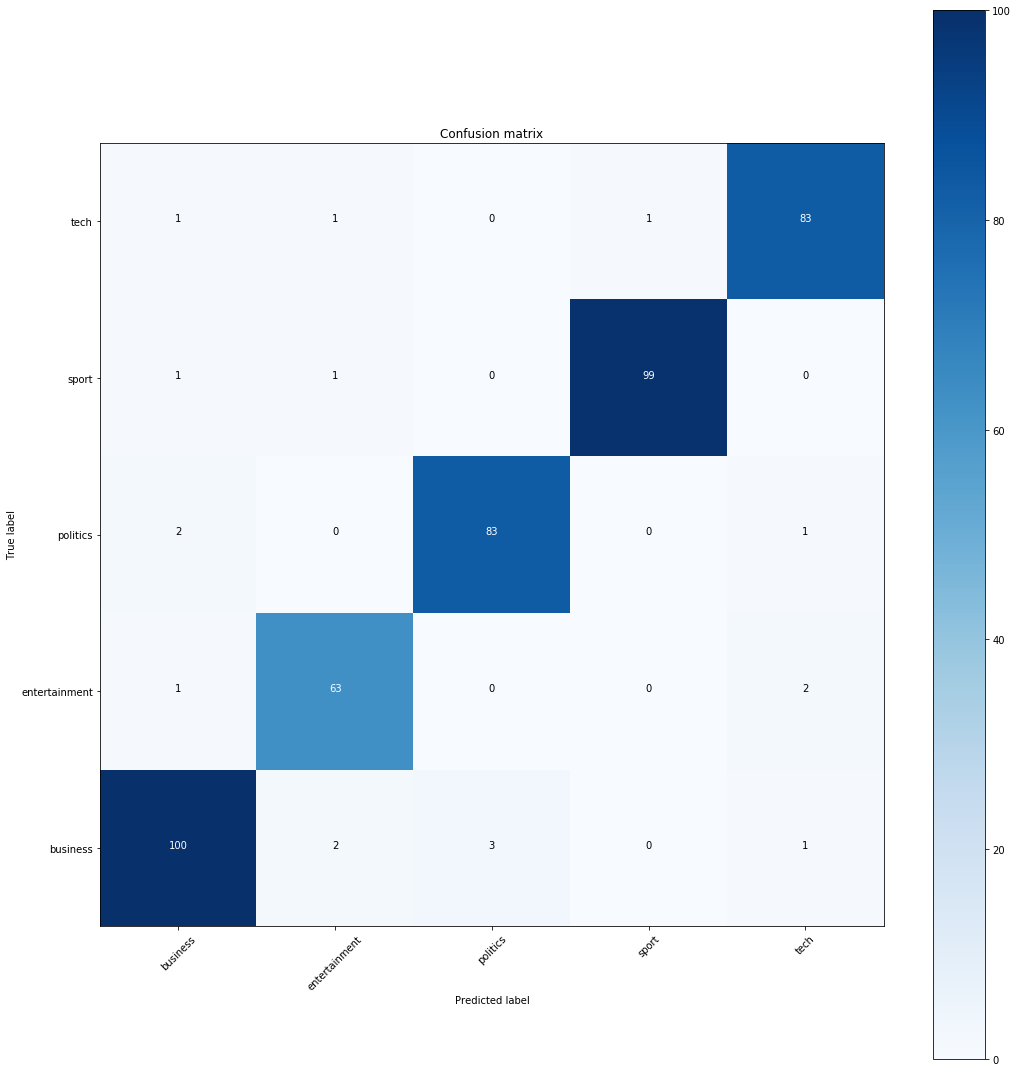

In [87]:
cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(15,15))
plt.ylim(-0.5, 4.5)
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix without normalization",normalize=False)
plt.show()


Hyperparamter tuning:
In model:
epoch, 
batch size, 
dropout ratio, 
network structure, 
activation function, 
and others

Outside model:
reducing the max words of the call to keras.preprocessing.text.Tokenizer. This will reduce the number of words for each input sample, thus making it more challenging to accurately predict the category. 
The default was up to 1000 words per article. See what happens when you reduce that number to 200 words, or 50 words, or even fewer. 


In [88]:
# Encapulated the model definition and training and evaluation calls into one function call. 
def run_experiment(batch_size, epochs, drop_ratio):
  print('batch size: {}, epochs: {}, drop_ratio: {}'.format(
      batch_size, epochs, drop_ratio))
  model = models.Sequential()
  model.add(layers.Dense(512, input_shape=(max_words,)))
  model.add(layers.Activation('relu'))
  model.add(layers.Dropout(drop_ratio))
  model.add(layers.Dense(num_classes))
  model.add(layers.Activation('softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0,
                    validation_split=0.1)
  score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=0)
  print('\tTest loss:', score[0])
  print('\tTest accuracy:', score[1])

In [89]:
batch_size = 16
epochs = 4
drop_ratio = 0.4
run_experiment(batch_size, epochs, drop_ratio)

batch size: 16, epochs: 4, drop_ratio: 0.4
	Test loss: 0.1159059208430601
	Test accuracy: 0.96629214


Make some predictions on individual examples

In [110]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               512512    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 2565      
_________________________________________________________________
activation_1 (Activation)    (None, 5)                 0         
Total params: 515,077
Trainable params: 515,077
Non-trainable params: 0
_________________________________________________________________


In [107]:
X_validate=['burnley set sights on signing Southampton 25-yr-old Hasenhuttl may let go. burnley have set their sights on signing Southampton midfielder Harrison Reed after his impressive Fulham loan, Football Insider understands. the 25-year-old has entered the final 12 months of his Saints deal and his future at the club is up in the air. A Burnley source has told Football Insider the club are keeping close tabs on Harrison as they plot a move ahead of the window opening next week. manager sean dyche is an admirer of Reed and has been impressed at how he has flourished in a midfield anchorman role for promotion-chasing Fulham. Reed appears well down the pecking order at Southampton and Ralph Hasenhuttl was happy for him to go out on loan this season. The Saints manager may now be willing to offload him this summer. reed spent the 2018-19 campaign at Blackburn Rovers after spending the previous season at Norwich City. a versatile midfielder who can play centrally or on the right flank, he has made only 30 senior appearances for the Saints since graduating from their academy set-up. reed has made 21 league starts among 25 appearances in all competitions for Fulham this season, in which he has missed a major chunk with a calf injury. the youth international has also been capped 14 times by England at Under-20 level. in other Southampton news, a Liverpool big name has been backed to sign for the Saints.','Progressive Democrat who ousted establishment-backed congressman says hes right in alignment with Biden. Washington a progressive Democrat who ousted a longtime establishment congressman in a New York primary earlier this month said Monday that he is right in alignment with presumptive Democratic presidential nominee Joe Biden, who is running as a moderate Democrat. The comments by Jamaal Bowman, a former middle school principal who defeated House Foreign Affairs Chairman Eliot Engel, underline a recognition by Democrats across the ideological spectrum that avoiding the intra-party fractures that helped sink Hillary Clinton in 2016 will be necessary to beat Donald Trump this November. In this moment we are dealing with the second biggest crisis since the Great Depression. We have to get people back to work, we got to get a handle on this pandemic. And I am right in alignment with Joe Biden in fighting those fights as well as fighting for racial and economic justice in all its forms, Bowman told CNNs John Berman on New Day Monday morning. In particular, Bowman cited a policy platform crafted by allies of Biden and Sen. Bernie Sanders of Vermont that was unveiled earlier this month and represents an effort by the former vice president to include progressive priorities in his general election campaign.']
valid_text=['sport','politics']

In [108]:
x_valid = tokenize.texts_to_matrix(X_validate)

In [109]:
for i in range(2):
    prediction = model.predict(np.array([x_valid[i]]))
    predicted_label = text_labels[np.argmax(prediction)]
    print(valid_text.iloc[i][:20], "...")
    print('Actual label:' + test_cat.iloc[i])
    print("Predicted label: " + predicted_label + "\n")  

Predicted label: sport

Predicted label: politics



Run neural network:
Reference: https://www.kaggle.com/yufengdev/bbc-text-categorization